In [51]:
import numpy as np
import scipy as sp
import skimage
import matplotlib.pyplot as plt
import imageio
import pylab
from glob import glob

In [6]:
data_paths = sorted(glob("./data/*"))

In [7]:
data_paths

['./data/video_001.mp4', './data/video_002.mp4']

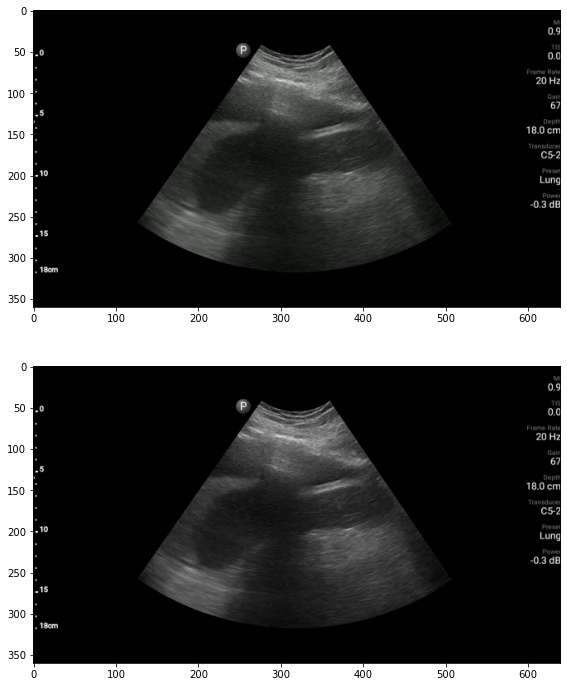

In [39]:
ims = np.zeros((2,360,640,3))

for i in range(len(data_paths)):
    vid = imageio.get_reader(data_paths[i], 'ffmpeg')
    ims[i] = vid.get_data(30)
    
ims = ims / 255

fig, axs = plt.subplots(2)
fig.set_size_inches(15,12)

axs[0].imshow(ims[1])

ocimg = np.mean(ims[1], axis=2)
axs[1].imshow(ocimg, cmap = 'gray')
plt.show()

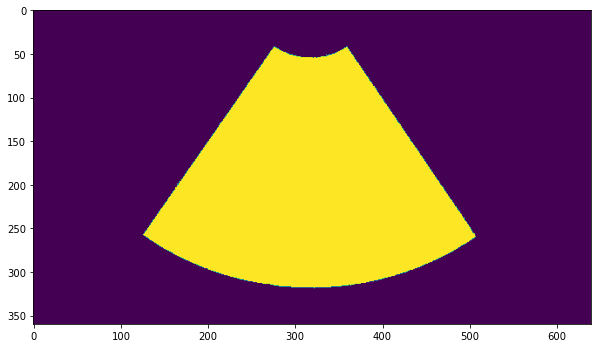

In [99]:
mask = ocimg > 0.006
labelled = skimage.measure.label(mask)
num = labelled[200,300]
plt.rcParams["figure.figsize"] = (10,15)
USmask = labelled == num
plt.imshow(USmask)
plt.show()

In [66]:
def curved_to_linear_sampling(curved_data, target_xsize, target_ysize, mask):
    midline = np.shape(curved_data)[1] // 2
    indices = np.where()

SyntaxError: invalid syntax (<ipython-input-66-455680ca2399>, line 1)

## TODO

- normalize image dimensions to (0,1) in one axis for generalization to other images
- compute resampling
    - gaussian weights ?
    - ex. rectilinear image: 10,10 -> maps to 12.3, 15.75, middle pixel of kernel 12, 16
    - perhaps use fixed gaussian weights, perhaps calculate kernel weights per pixel
    - perhaps use ITKUltrasound -- convert physical point to continuous index could be helpful
    

[False  True]
[ 42 276] [ 42 359] [257 126] [259 507]


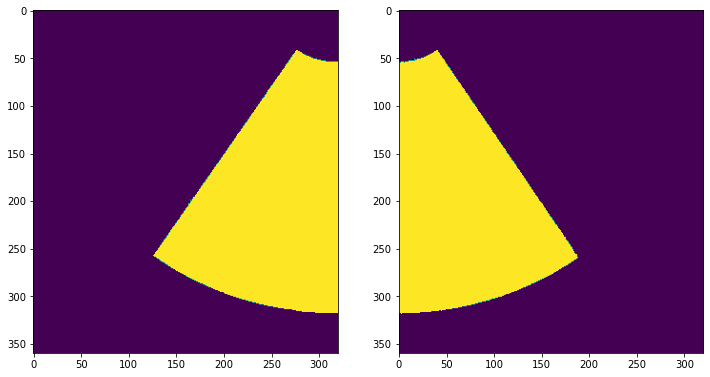

In [98]:
curved_data = ocimg
target_xsize = 350
target_ysize = 250
mask = USmask
midline = np.shape(mask)[1] // 2

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,15)
axs[0].imshow(mask[:,0:midline])
axs[1].imshow(mask[:,midline:])
print(np.unique(mask))

left_indices = np.asarray(np.where(mask[:,0:midline] == 1))
right_indices = np.asarray(np.where(mask[:,midline:] == 1))

top_left = left_indices[:,np.argmin(left_indices[0])]
top_right = right_indices[:,np.argmin(right_indices[0])] + np.array([0,320])
bottom_left = left_indices[:,np.argmin(left_indices[1])]
bottom_right = right_indices[:,np.argmax(right_indices[1])] + np.array([0,320])

print(top_left, top_right, bottom_left, bottom_right)

# given two points, find vector connecting them
# then find normal to that vector: n1, n2
# equation of line connecting points is n1 x + n2 y = 0



In [91]:
np.all(mask[:,0:midline][:,-1] == mask[:,midline:][:,0])
np.shape(mask[:,0:midline])

(360, 320)

In [93]:
np.array([1,2]) + np.array([4,7])

array([5, 9])